# Final Project Intro To Data Science

## Itay itzhak
## Roi shricki

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

### Read CSV file and encoding

In [2]:
DataFrame = pd.read_csv("DataSetAshdod.csv",encoding = "ISO-8859-8")


In [3]:
DataFrame

,מטבח כשר,משופצת,"ממ""ד",מזגן תדיראן,ריהוט,גישה לנכים,מיזוג,מעלית,מחסן,סורגים,...,קומות בבנין,מצב הנכס,סוג נכס,עיר,שכונה,תיווך,חדרים,קומה,"מ""ר",מחיר
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.0,חדש מקבלן,דירה,דירה,[],0.0,3,2,90,"1,390,000 ¤"
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,7.0,משופץ,דירה,אשדוד,"["" רובע ו'""]",0.0,4,2,91,"1,320,000 ¤"
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,משופץ,דירה,אשדוד,"["" רובע ב'""]",0.0,3.5,4,90,"1,280,000 ¤"
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,משופץ,דירה,אשדוד,"["" רובע ו'""]",1.0,4,5,96,"1,470,000 ¤"
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,משופץ,דירה,אשדוד,"["" רובע ה'""]",0.0,3.5,1,68,"1,320,000 ¤"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,7.0,חדש מקבלן,דירה,אשדוד,[],1.0,3,7,110,"1,480,000 ¤"
2295,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,NaN,משופץ,בית פרטי/קוטג',אשדוד,"[' רובע י""ז']",1.0,6,קרקע,300,"6,800,000 ¤"
2296,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,7.0,חדש מקבלן,דירה,אשדוד,[],0.0,4,5,100,"1,520,000 ¤"
2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,דירה,אשדוד,"["" רובע ט'""]",1.0,4,2,97,"1,590,000 ¤"


In [4]:
columnsNames = {"מחיר":"Price",'מ"ר':"SM","קומה":"Floor","חדרים":"Rooms","תיווך":"Through Agent","שכונה":"Region","עיר":"City","סוג נכס":"Type"
               ,"מצב הנכס":"Status","קומות בבנין":"Total Floors","מרפסות":"Balconies","חניות":"Parking","סורגים":"Bars","מחסן":"Storage Room","מעלית":"Lift",
               "מיזוג": "Air Conditioner","גישה לנכים":"Accessibility","ריהוט":"Furniture","מזגן תדיראן":"Tadiran AC",'ממ"ד':"Mamad",
               "משופצת":"Renovated","מטבח כשר":"Kosher Kitchen"}

### Rename columns to english

In [5]:
DataFrame=DataFrame.rename(columns=columnsNames)

In [6]:
DataFrame

,Kosher Kitchen,Renovated,Mamad,Tadiran AC,Furniture,Accessibility,Air Conditioner,Lift,Storage Room,Bars,...,Total Floors,Status,Type,City,Region,Through Agent,Rooms,Floor,SM,Price
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,12.0,חדש מקבלן,דירה,דירה,[],0.0,3,2,90,"1,390,000 ¤"
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,7.0,משופץ,דירה,אשדוד,"["" רובע ו'""]",0.0,4,2,91,"1,320,000 ¤"
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,משופץ,דירה,אשדוד,"["" רובע ב'""]",0.0,3.5,4,90,"1,280,000 ¤"
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,משופץ,דירה,אשדוד,"["" רובע ו'""]",1.0,4,5,96,"1,470,000 ¤"
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,משופץ,דירה,אשדוד,"["" רובע ה'""]",0.0,3.5,1,68,"1,320,000 ¤"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,7.0,חדש מקבלן,דירה,אשדוד,[],1.0,3,7,110,"1,480,000 ¤"
2295,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,NaN,משופץ,בית פרטי/קוטג',אשדוד,"[' רובע י""ז']",1.0,6,קרקע,300,"6,800,000 ¤"
2296,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,7.0,חדש מקבלן,דירה,אשדוד,[],0.0,4,5,100,"1,520,000 ¤"
2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,דירה,אשדוד,"["" רובע ט'""]",1.0,4,2,97,"1,590,000 ¤"


## Data processing

### Handling binary columns and category columns

In [7]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kosher Kitchen   2260 non-null   float64
 1   Renovated        2210 non-null   float64
 2   Mamad            2210 non-null   float64
 3   Tadiran AC       2196 non-null   float64
 4   Furniture        2210 non-null   float64
 5   Accessibility    2250 non-null   float64
 6   Air Conditioner  2210 non-null   float64
 7   Lift             2210 non-null   float64
 8   Storage Room     2250 non-null   float64
 9   Bars             2210 non-null   float64
 10  Parking          2240 non-null   object 
 11  Balconies        1522 non-null   float64
 12  Total Floors     2087 non-null   float64
 13  Status           2204 non-null   object 
 14  Type             2241 non-null   object 
 15  City             2241 non-null   object 
 16  Region           2241 non-null   object 
 17  Through Agent 

In [8]:
binaryColumns =[]
notBinaryColumns=[]
for i in DataFrame.columns:
    values=DataFrame[i].value_counts()
    if(len(values)>2):
        notBinaryColumns.append(i)
    else:
        binaryColumns.append(i)

In [9]:
binaryColumns

['Kosher Kitchen',
 'Renovated',
 'Mamad',
 'Tadiran AC',
 'Furniture',
 'Accessibility',
 'Air Conditioner',
 'Lift',
 'Storage Room',
 'Bars',
 'Through Agent']

In [10]:
notBinaryColumns

['Parking',
 'Balconies',
 'Total Floors',
 'Status',
 'Type',
 'City',
 'Region',
 'Rooms',
 'Floor',
 'SM',
 'Price']

In [11]:
print("------------------------------------------")
for i in binaryColumns:
    print(DataFrame[i].value_counts())
    print("------------------------------------------")
    

------------------------------------------
0.0    1273
1.0     987
Name: Kosher Kitchen, dtype: int64
------------------------------------------
1.0    1726
0.0     484
Name: Renovated, dtype: int64
------------------------------------------
1.0    1659
0.0     551
Name: Mamad, dtype: int64
------------------------------------------
1.0    1456
0.0     740
Name: Tadiran AC, dtype: int64
------------------------------------------
0.0    1182
1.0    1028
Name: Furniture, dtype: int64
------------------------------------------
1.0    1689
0.0     561
Name: Accessibility, dtype: int64
------------------------------------------
1.0    2057
0.0     153
Name: Air Conditioner, dtype: int64
------------------------------------------
1.0    1798
0.0     412
Name: Lift, dtype: int64
------------------------------------------
1.0    1316
0.0     934
Name: Storage Room, dtype: int64
------------------------------------------
1.0    1228
0.0     982
Name: Bars, dtype: int64
-------------------------

In [12]:
print("------------------------------------------")
for i in notBinaryColumns:
    print(DataFrame[i].value_counts())
    print("------------------------------------------")

------------------------------------------
1      1303
ללא     707
2       210
3        20
Name: Parking, dtype: int64
------------------------------------------
1.0    1177
2.0     280
3.0      65
Name: Balconies, dtype: int64
------------------------------------------
7.0     448
8.0     396
4.0     223
9.0     204
3.0     189
2.0     111
6.0     100
10.0     63
13.0     41
1.0      39
12.0     35
14.0     30
11.0     25
20.0     23
17.0     22
18.0     21
22.0     17
21.0     17
5.0      16
15.0     16
19.0     13
24.0     10
28.0      7
16.0      7
29.0      6
40.0      2
25.0      2
27.0      1
26.0      1
23.0      1
30.0      1
Name: Total Floors, dtype: int64
------------------------------------------
משופץ         1179
במצב שמור      591
חדש            195
חדש מקבלן      184
דרוש שיפוץ      55
Name: Status, dtype: int64
------------------------------------------
דירה                    1667
דירת גן                  151
גג/פנטהאוז               131
בית פרטי/קוטג'           128


### Handling records without values in binary columns

In [13]:
for binaryColumn in binaryColumns:
    DataFrame.loc[:,binaryColumn].replace(np.nan, 0.0, inplace=True)

In [14]:
notBinaryColumns

['Parking',
 'Balconies',
 'Total Floors',
 'Status',
 'Type',
 'City',
 'Region',
 'Rooms',
 'Floor',
 'SM',
 'Price']

In [15]:
def makeItCategorial(column):
    numOfOptions=0
    newRow={}
    for row in DataFrame[column]:
        if row is np.nan:
            continue
        if  newRow.get(row)==None:
            newRow[row]=numOfOptions
            numOfOptions+=1
    return newRow

dictonary=[]

def replaceStringsToNumbers (column):
    numbersList = makeItCategorial(column)
    dictonary.append(numbersList)
    print("-----------------------------------------------------")
    print(numbersList)
    DataFrame[column].replace(numbersList,inplace=True)

### Cleaning wrong data

In [16]:
wrongCities=["דירת נופש","קב' רכישה/ זכות לנכס","דו משפחתי","דופלקס","גג/פנטהאוז","בית פרטי/קוטג'","מגרשים","דירה","דירת גן"," אשדוד"]
correctCity="אשדוד"
rowsToDelete=[]
for i in range(len(wrongCities)):
    DataFrame.loc[:,"City"].replace(wrongCities[i],correctCity,inplace=True)
    
for i in range (len(DataFrame["City"])):
    if DataFrame["City"][i]!="אשדוד" and DataFrame["City"][i]!=None:
        rowsToDelete.append(i)
    else:
        if DataFrame["Region"][i]=="[' קרית חלוצים']" :
            rowsToDelete.append(i)
        else:
            if DataFrame["SM"][i]=="לא צוין":
                rowsToDelete.append(i)
            else:
                if DataFrame["Rooms"][i]=="-" or DataFrame["Rooms"][i]==np.nan:
                    rowsToDelete.append(i)
                    
DataFrame.loc[:,"City"].replace(np.nan,"אשדוד",inplace=True)
DataFrame.drop(DataFrame.index[rowsToDelete],axis=0,inplace=True)
DataFrame.reset_index(inplace=True)
del DataFrame["index"]



### Handling records without values in category columns

In [17]:
DataFrame.loc[:, "Parking"].replace("ללא",np.nan , inplace=True)
DataFrame.loc[:, "Parking"].replace(np.nan,0, inplace=True) 
DataFrame.loc[:, "Balconies"].replace(np.nan,0, inplace=True)
DataFrame.loc[:, "Total Floors"].replace(np.nan,0, inplace=True)
DataFrame.loc[:, "Floor"].replace("קרקע",0, inplace=True)
replaceStringsToNumbers("Status")
replaceStringsToNumbers("Type")
DataFrame.loc[:,"Price"].replace("לא צוין מחיר",np.nan,inplace=True)
DataFrame.loc[:,"Region"].replace("[]",np.nan,inplace=True)
replaceStringsToNumbers("Region")
DataFrame.loc[:,"Rooms"].replace("-",np.nan,inplace=True)



-----------------------------------------------------
{'חדש מקבלן': 0, 'משופץ': 1, 'במצב שמור': 2, 'חדש': 3, 'דרוש שיפוץ': 4}
-----------------------------------------------------
{'דירה': 0, "בית פרטי/קוטג'": 1, 'דירת גן': 2, 'דופלקס': 3, 'גג/פנטהאוז': 4, 'דו משפחתי': 5, 'טריפלקס': 6, 'דירת נופש': 7}
-----------------------------------------------------
{'[" רובע ו\'"]': 0, '[" רובע ב\'"]': 1, '[" רובע ה\'"]': 2, "[' רובע הקריה', ' הסיטי']": 3, '[\' רובע י"ז\']': 4, "[' מרינה']": 5, '[" רובע ג\'"]': 6, '[" רובע א\'"]': 7, '[\' רובע י"ג\']': 8, '[" רובע ט\'"]': 9, '[\' הקריה מע"ר\']': 10, '[" רובע ד\'"]': 11, '[\' רובע י"א\']': 12, '[" רובע י\'"]': 13, '[\' רובע ט"ו\']': 14, '[" רובע ח\'"]': 15, '[\' רובע ט"ז\']': 16, '[\' רובע י"ב\']': 17, '[" רובע ז\'"]': 18}


In [18]:
rowsWithoutPrice=[]
for i in range(len(DataFrame["Price"])):
    if DataFrame["Price"][i] is not np.nan:
        DataFrame.loc[i,["Price"]]= float(str(DataFrame["Price"][i]).split(" ")[0].replace(",",""))
    else :
        rowsWithoutPrice.append(i)
DataFrame.drop(DataFrame.index[rowsWithoutPrice],axis=0,inplace=True)
DataFrame.reset_index(inplace=True)
del DataFrame["index"]
del DataFrame["City"]

In [19]:
DataFrame=DataFrame.astype(float)

In [20]:
DataFrame

,Kosher Kitchen,Renovated,Mamad,Tadiran AC,Furniture,Accessibility,Air Conditioner,Lift,Storage Room,Bars,...,Balconies,Total Floors,Status,Type,Region,Through Agent,Rooms,Floor,SM,Price
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,12.0,0.0,0.0,NaN,0.0,3.0,2.0,90.0,1390000.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,7.0,1.0,0.0,0.0,0.0,4.0,2.0,91.0,1320000.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,6.0,1.0,0.0,1.0,0.0,3.5,4.0,90.0,1280000.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,7.0,1.0,0.0,0.0,1.0,4.0,5.0,96.0,1470000.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,3.0,1.0,0.0,2.0,0.0,3.5,1.0,68.0,1320000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,7.0,0.0,0.0,NaN,1.0,3.0,7.0,110.0,1480000.0
1990,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,0.0,1.0,1.0,4.0,1.0,6.0,0.0,300.0,6800000.0
1991,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,7.0,0.0,0.0,NaN,0.0,4.0,5.0,100.0,1520000.0
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,9.0,1.0,4.0,2.0,97.0,1590000.0


In [21]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kosher Kitchen   1994 non-null   float64
 1   Renovated        1994 non-null   float64
 2   Mamad            1994 non-null   float64
 3   Tadiran AC       1994 non-null   float64
 4   Furniture        1994 non-null   float64
 5   Accessibility    1994 non-null   float64
 6   Air Conditioner  1994 non-null   float64
 7   Lift             1994 non-null   float64
 8   Storage Room     1994 non-null   float64
 9   Bars             1994 non-null   float64
 10  Parking          1994 non-null   float64
 11  Balconies        1994 non-null   float64
 12  Total Floors     1994 non-null   float64
 13  Status           1978 non-null   float64
 14  Type             1994 non-null   float64
 15  Region           1296 non-null   float64
 16  Through Agent    1994 non-null   float64
 17  Rooms         

### Drop duplicates

In [22]:
DataFrame.drop_duplicates()

,Kosher Kitchen,Renovated,Mamad,Tadiran AC,Furniture,Accessibility,Air Conditioner,Lift,Storage Room,Bars,...,Balconies,Total Floors,Status,Type,Region,Through Agent,Rooms,Floor,SM,Price
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,12.0,0.0,0.0,NaN,0.0,3.0,2.0,90.0,1390000.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,7.0,1.0,0.0,0.0,0.0,4.0,2.0,91.0,1320000.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,6.0,1.0,0.0,1.0,0.0,3.5,4.0,90.0,1280000.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,7.0,1.0,0.0,0.0,1.0,4.0,5.0,96.0,1470000.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,3.0,1.0,0.0,2.0,0.0,3.5,1.0,68.0,1320000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,7.0,0.0,0.0,NaN,1.0,3.0,7.0,110.0,1480000.0
1990,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,0.0,1.0,1.0,4.0,1.0,6.0,0.0,300.0,6800000.0
1991,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,7.0,0.0,0.0,NaN,0.0,4.0,5.0,100.0,1520000.0
1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,9.0,1.0,4.0,2.0,97.0,1590000.0


In [23]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kosher Kitchen   1994 non-null   float64
 1   Renovated        1994 non-null   float64
 2   Mamad            1994 non-null   float64
 3   Tadiran AC       1994 non-null   float64
 4   Furniture        1994 non-null   float64
 5   Accessibility    1994 non-null   float64
 6   Air Conditioner  1994 non-null   float64
 7   Lift             1994 non-null   float64
 8   Storage Room     1994 non-null   float64
 9   Bars             1994 non-null   float64
 10  Parking          1994 non-null   float64
 11  Balconies        1994 non-null   float64
 12  Total Floors     1994 non-null   float64
 13  Status           1978 non-null   float64
 14  Type             1994 non-null   float64
 15  Region           1296 non-null   float64
 16  Through Agent    1994 non-null   float64
 17  Rooms         

# EDA 

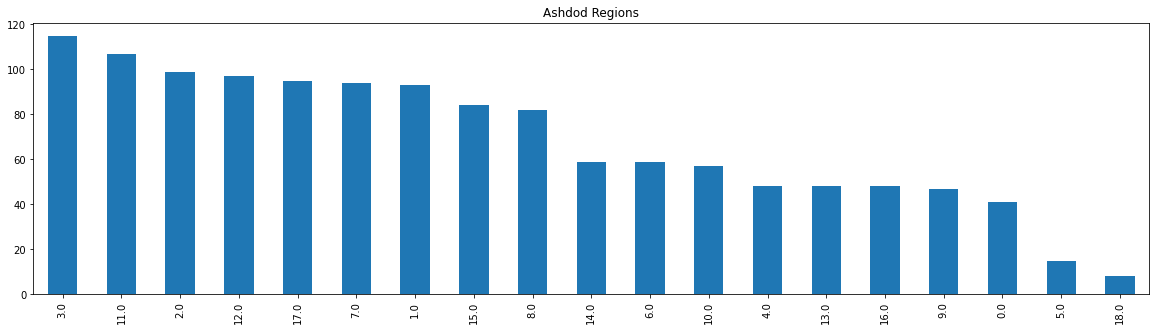

[" רובע ו'"] 0
[" רובע ב'"] 1
[" רובע ה'"] 2
[' רובע הקריה', ' הסיטי'] 3
[' רובע י"ז'] 4
[' מרינה'] 5
[" רובע ג'"] 6
[" רובע א'"] 7
[' רובע י"ג'] 8
[" רובע ט'"] 9
[' הקריה מע"ר'] 10
[" רובע ד'"] 11
[' רובע י"א'] 12
[" רובע י'"] 13
[' רובע ט"ו'] 14
[" רובע ח'"] 15
[' רובע ט"ז'] 16
[' רובע י"ב'] 17
[" רובע ז'"] 18


In [24]:
plt.figure(figsize=(20,5))
DataFrame["Region"].value_counts().plot(kind="bar")
plt.title("Ashdod Regions")
plt.show()
for key in dictonary[2]:
    print(key,dictonary[2][key])


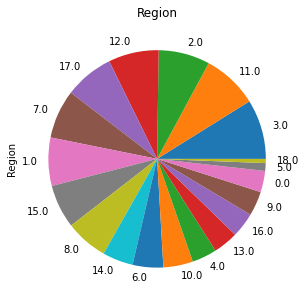

[" רובע ו'"] 0
[" רובע ב'"] 1
[" רובע ה'"] 2
[' רובע הקריה', ' הסיטי'] 3
[' רובע י"ז'] 4
[' מרינה'] 5
[" רובע ג'"] 6
[" רובע א'"] 7
[' רובע י"ג'] 8
[" רובע ט'"] 9
[' הקריה מע"ר'] 10
[" רובע ד'"] 11
[' רובע י"א'] 12
[" רובע י'"] 13
[' רובע ט"ו'] 14
[" רובע ח'"] 15
[' רובע ט"ז'] 16
[' רובע י"ב'] 17
[" רובע ז'"] 18


In [25]:
plt.figure(figsize=(20,5))
DataFrame["Region"].value_counts().plot(kind="pie")
plt.title("Region")
plt.show()
for key in dictonary[2]:
    print(key,dictonary[2][key])

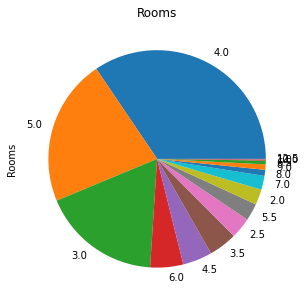

In [26]:
plt.figure(figsize=(20,5))
DataFrame["Rooms"].value_counts().plot(kind="pie")
plt.title("Rooms")
plt.show()

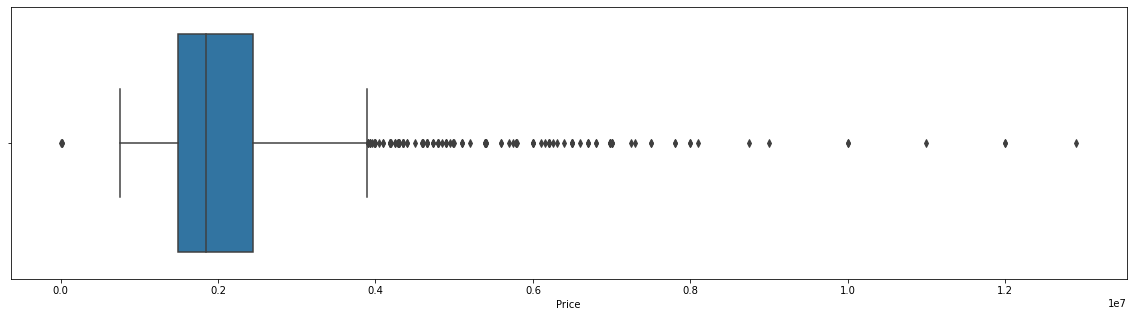

sum off outliers : 49
min of outliers in Price column : 6000000.0


,Kosher Kitchen,Renovated,Mamad,Tadiran AC,Furniture,Accessibility,Air Conditioner,Lift,Storage Room,Bars,...,Balconies,Total Floors,Status,Type,Region,Through Agent,Rooms,Floor,SM,Price
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,0.0,0.0,1.0,4.0,0.0,6.0,0.0,309.0,7500000.0
40,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3.0,0.0,3.0,1.0,14.0,0.0,7.0,0.0,600.0,8100000.0
58,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,1.0,4.0,1.0,6.0,0.0,300.0,6800000.0
128,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,13.0,1.0,4.0,17.0,1.0,5.0,13.0,360.0,6200000.0
135,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,10.0,3.0,4.0,5.0,1.0,5.0,10.0,390.0,9000000.0
150,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3.0,0.0,1.0,1.0,12.0,0.0,8.0,0.0,372.0,6100000.0
219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,2.0,1.0,14.0,1.0,9.0,0.0,1230.0,12000000.0
323,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,1.0,14.0,1.0,5.5,0.0,600.0,10000000.0
414,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,NaN,1.0,5.5,0.0,195.0,6500000.0
498,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,1.0,14.0,1.0,5.5,0.0,600.0,10000000.0


In [27]:
plt.figure(figsize=(20,5))
sns.boxplot(DataFrame.Price)
plt.show()
z_score = (DataFrame["Price"] - DataFrame["Price"].mean()) / DataFrame["Price"].std()
outliers = abs(z_score) > 3
print("sum off outliers : "+str(sum(outliers)))
print("min of outliers in Price column : "+ str(min(DataFrame.Price[outliers])))
DataFrame[DataFrame["Price"]>min(DataFrame.Price[outliers])]

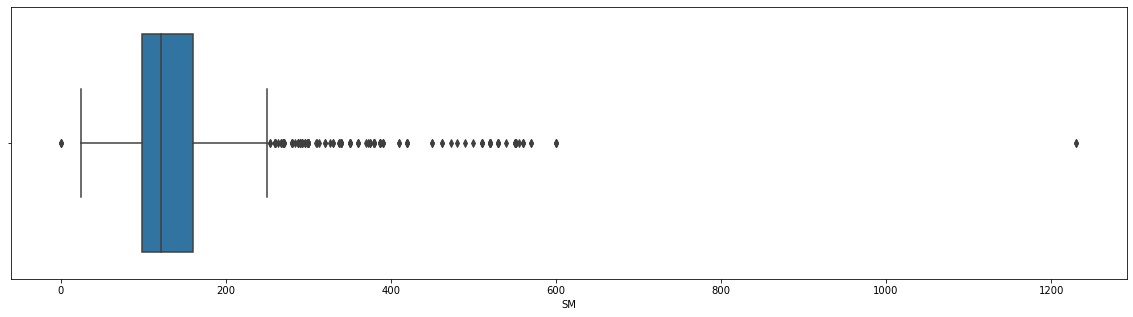

sum off outliers : 50
min of outliers in Square Meter column : 420.0


,Kosher Kitchen,Renovated,Mamad,Tadiran AC,Furniture,Accessibility,Air Conditioner,Lift,Storage Room,Bars,...,Balconies,Total Floors,Status,Type,Region,Through Agent,Rooms,Floor,SM,Price
40,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3.0,0.0,3.0,1.0,14.0,0.0,7.0,0.0,600.0,8100000.0
93,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,8.0,1.0,2.0,NaN,1.0,6.5,0.0,462.0,3490000.0
119,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3.0,0.0,4.0,1.0,12.0,1.0,9.0,0.0,480.0,4600000.0
219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,2.0,1.0,14.0,1.0,9.0,0.0,1230.0,12000000.0
239,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,NaN,1.0,8.0,0.0,570.0,5790000.0
323,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,1.0,14.0,1.0,5.5,0.0,600.0,10000000.0
336,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,2.0,1.0,NaN,0.0,5.0,0.0,560.0,4190000.0
498,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,1.0,14.0,1.0,5.5,0.0,600.0,10000000.0
511,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,2.0,1.0,NaN,0.0,5.0,0.0,560.0,4190000.0
521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,2.0,NaN,1.0,6.5,0.0,462.0,3490000.0


In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(DataFrame.SM)
plt.show()
z_score = (DataFrame["SM"] - DataFrame["SM"].mean()) / DataFrame["SM"].std()
outliers = abs(z_score) > 3
print("sum off outliers : "+str(sum(outliers)))
print("min of outliers in Square Meter column : "+ str(min(DataFrame.SM[outliers])))
DataFrame[DataFrame["SM"]>min(DataFrame.SM[outliers])]


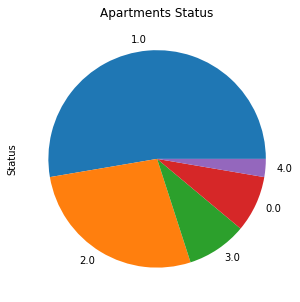

חדש מקבלן 0
משופץ 1
במצב שמור 2
חדש 3
דרוש שיפוץ 4


In [29]:
plt.figure(figsize=(20,5))
DataFrame["Status"].value_counts().plot(kind="pie")
plt.title("Apartments Status")
plt.show()
for key in dictonary[0]:
    print(key,dictonary[0][key])

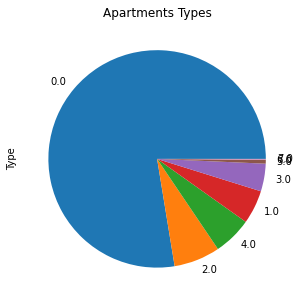

דירה 0
בית פרטי/קוטג' 1
דירת גן 2
דופלקס 3
גג/פנטהאוז 4
דו משפחתי 5
טריפלקס 6
דירת נופש 7


In [30]:
plt.figure(figsize=(20,5))
DataFrame["Type"].value_counts().plot(kind="pie")
plt.title("Apartments Types")
plt.show()
for key in dictonary[1]:
    print(key,dictonary[1][key])

In [31]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Kosher Kitchen   1994 non-null   float64
 1   Renovated        1994 non-null   float64
 2   Mamad            1994 non-null   float64
 3   Tadiran AC       1994 non-null   float64
 4   Furniture        1994 non-null   float64
 5   Accessibility    1994 non-null   float64
 6   Air Conditioner  1994 non-null   float64
 7   Lift             1994 non-null   float64
 8   Storage Room     1994 non-null   float64
 9   Bars             1994 non-null   float64
 10  Parking          1994 non-null   float64
 11  Balconies        1994 non-null   float64
 12  Total Floors     1994 non-null   float64
 13  Status           1978 non-null   float64
 14  Type             1994 non-null   float64
 15  Region           1296 non-null   float64
 16  Through Agent    1994 non-null   float64
 17  Rooms         

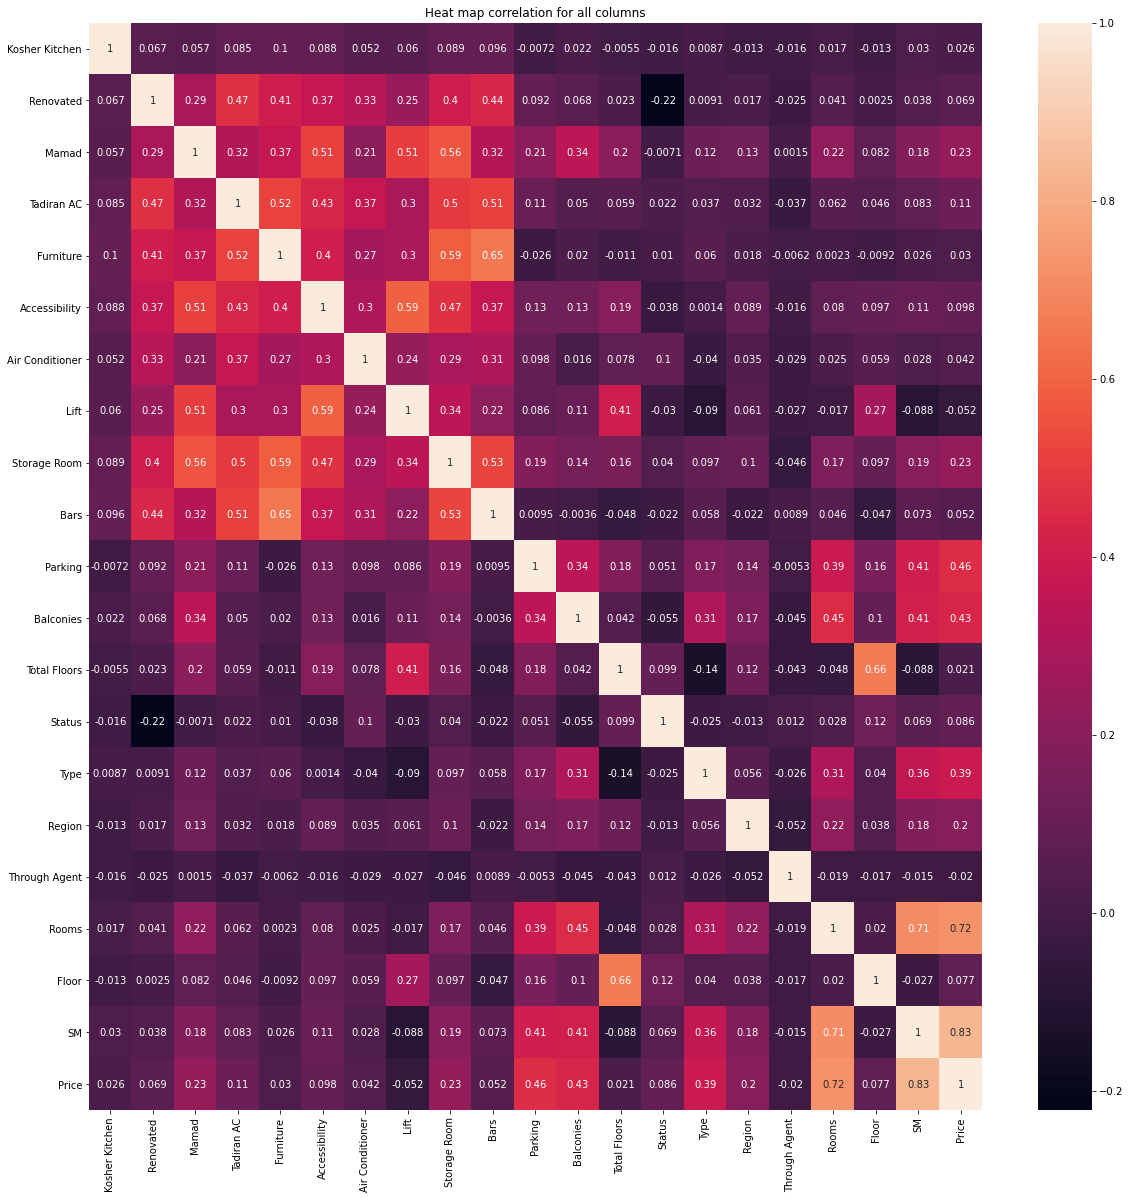

In [32]:
plt.figure(figsize=(20, 20))
sns.heatmap(DataFrame.corr(), annot=True)
plt.title('Heat map correlation for all columns')
plt.show()

In [33]:
notBinaryColumns

['Parking',
 'Balconies',
 'Total Floors',
 'Status',
 'Type',
 'City',
 'Region',
 'Rooms',
 'Floor',
 'SM',
 'Price']

In [34]:
binaryColumns

['Kosher Kitchen',
 'Renovated',
 'Mamad',
 'Tadiran AC',
 'Furniture',
 'Accessibility',
 'Air Conditioner',
 'Lift',
 'Storage Room',
 'Bars',
 'Through Agent']

### Add columns with maximum contact according to the heat map to make the model more accurate

In [35]:
def makeItOneColumn(columnsArray, newColName):
    DataFrame[newColName]=DataFrame[columnsArray[0]]
    for i in range(len(columnsArray)-1):
        DataFrame[newColName]+=DataFrame[columnsArray[i+1]]

In [36]:
extraAreas = ["Parking","Balconies","Storage Room"]
makeItOneColumn(extraAreas,"Extra Areas Score")


In [37]:
DataFrame["Rooms"].mean()

4.249247743229689

In [38]:
DataFrame["Total Rooms Score"] = DataFrame["Rooms"]
for i in range(len(DataFrame["Rooms"])):
    if DataFrame["Rooms"][i] >= 5 :
        DataFrame["Total Rooms Score"][i]=3
    else:
        if DataFrame["Rooms"][i] >3.5 and DataFrame["Rooms"][i]<5:
            DataFrame["Total Rooms Score"][i]=2
        else:
            if DataFrame["Rooms"][i]<=3.5 :
                DataFrame["Total Rooms Score"][i]=1

In [39]:
DataFrame["Total Rooms Score"].value_counts()

2.0    774
3.0    674
1.0    546
Name: Total Rooms Score, dtype: int64

### We will delete columns whose values are exceptional in order to improve the prediction

In [40]:
del DataFrame["Status"]
del DataFrame["Region"]
del DataFrame["Through Agent"]
del DataFrame["Kosher Kitchen"]
rowsToDelete=[]
for i in range(len(DataFrame["Price"])):
    if DataFrame["Price"][i]>6000000 or DataFrame["Price"][i]<800000:
        rowsToDelete.append(i)
    if DataFrame["SM"][i]<20 or DataFrame["SM"][i]>500:
        rowsToDelete.append(i)
DataFrame.drop(DataFrame.index[rowsToDelete],axis=0,inplace=True)
DataFrame.reset_index(inplace=True)
del DataFrame["index"]
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Renovated          1915 non-null   float64
 1   Mamad              1915 non-null   float64
 2   Tadiran AC         1915 non-null   float64
 3   Furniture          1915 non-null   float64
 4   Accessibility      1915 non-null   float64
 5   Air Conditioner    1915 non-null   float64
 6   Lift               1915 non-null   float64
 7   Storage Room       1915 non-null   float64
 8   Bars               1915 non-null   float64
 9   Parking            1915 non-null   float64
 10  Balconies          1915 non-null   float64
 11  Total Floors       1915 non-null   float64
 12  Type               1915 non-null   float64
 13  Rooms              1915 non-null   float64
 14  Floor              1915 non-null   float64
 15  SM                 1915 non-null   float64
 16  Price              1915 

# Learning machine

### Division of the information into a training group and a test group

In [41]:
def prepareToTrainAndTest(dataFrame, label_column):
   

    trainingSet = dataFrame.columns[dataFrame.columns != str(label_column)]
    tragetColumn = str(label_column)
    X = dataFrame[trainingSet]
    y = dataFrame[tragetColumn]
    
    return X,y

In [42]:
X,y=prepareToTrainAndTest(DataFrame,"Price")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Renovated          1915 non-null   float64
 1   Mamad              1915 non-null   float64
 2   Tadiran AC         1915 non-null   float64
 3   Furniture          1915 non-null   float64
 4   Accessibility      1915 non-null   float64
 5   Air Conditioner    1915 non-null   float64
 6   Lift               1915 non-null   float64
 7   Storage Room       1915 non-null   float64
 8   Bars               1915 non-null   float64
 9   Parking            1915 non-null   float64
 10  Balconies          1915 non-null   float64
 11  Total Floors       1915 non-null   float64
 12  Type               1915 non-null   float64
 13  Rooms              1915 non-null   float64
 14  Floor              1915 non-null   float64
 15  SM                 1915 non-null   float64
 16  Extra Areas Score  1915 

### normalization

In [43]:
print(y)
scaler=StandardScaler()
X=scaler.fit_transform(X)

minimum = y.min()
maximum = y.max()
for i in range(len(y)):
    y[i] = (y[i]-minimum)/(maximum - minimum)
    
print("Max y: ",y.max())
print("Min y: ",y.min())

0       1390000.0
1       1320000.0
2       1280000.0
3       1470000.0
4       1320000.0
          ...    
1910    1630000.0
1911    1480000.0
1912    1520000.0
1913    1590000.0
1914    1789000.0
Name: Price, Length: 1915, dtype: float64
Max y:  1.0
Min y:  0.0


# Linear Regression Algorithm

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
reg=LinearRegression()
reg.fit(xtrain,ytrain)
yPredict=reg.predict(xtest)
yScore = r2_score(ytest,yPredict)


In [45]:
def testAndPredictedTable(test,predict):
    testColumn={}
    testColumn["Test"] = test
    testColumn["Predicted"] = predict
    DF = pd.DataFrame(testColumn)
    DF.reset_index(inplace=True)
    del DF["index"]
    DF=DF.astype(float)
    return DF

Accuracy :  0.7860146646372913


        Test  Predicted
0   0.307992   0.252720
1   0.099415   0.080316
2   0.019493   0.031765
3   0.161793   0.219689
4   0.249513   0.250337
5   0.454191   0.318158
6   0.099415   0.128438
7   0.220273   0.252065
8   0.438596   0.400029
9   0.050682   0.022341
10  0.405458   0.362954
11  0.307992   0.392057
12  0.171540   0.281050
13  0.331384   0.365720
14  0.068226   0.066646
15  0.259259   0.353858
16  0.296296   0.376313
17  0.463938   0.334518
18  0.009747   0.021326
19  0.161793   0.266874
20  0.083821   0.058323
21  0.335283   0.338712
22  0.157895   0.203465
23  0.179142   0.172634
24  0.235867   0.240991


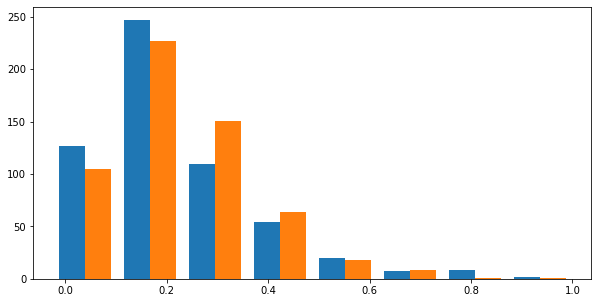

In [46]:
print("Accuracy : ",yScore)
print("\n")
tableA={}
tableA=testAndPredictedTable(ytest,yPredict)
print(tableA.head(25))
plt.figure(figsize=(10,5))
plt.hist(tableA,bins=8)
plt.show()

### Lasso Regression Algorithm

In [47]:
X,y=prepareToTrainAndTest(DataFrame,"Price")

scaler=StandardScaler()
X=scaler.fit_transform(X)

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)
las=Lasso(alpha=0.0001)
las.fit(xtrain,ytrain)
yPredict=las.predict(xtest)
yScore = r2_score(ytest,yPredict)


Accuracy :  0.7859389132901236


        Test  Predicted
0   0.307992   0.253068
1   0.099415   0.080539
2   0.019493   0.032125
3   0.161793   0.219323
4   0.249513   0.250121
5   0.454191   0.317873
6   0.099415   0.128714
7   0.220273   0.251682
8   0.438596   0.399529
9   0.050682   0.022539
10  0.405458   0.362458
11  0.307992   0.391712
12  0.171540   0.281160
13  0.331384   0.364637
14  0.068226   0.067348
15  0.259259   0.354205
16  0.296296   0.376617
17  0.463938   0.334528
18  0.009747   0.021389
19  0.161793   0.266615
20  0.083821   0.058054
21  0.335283   0.338381
22  0.157895   0.203667
23  0.179142   0.172743
24  0.235867   0.240773


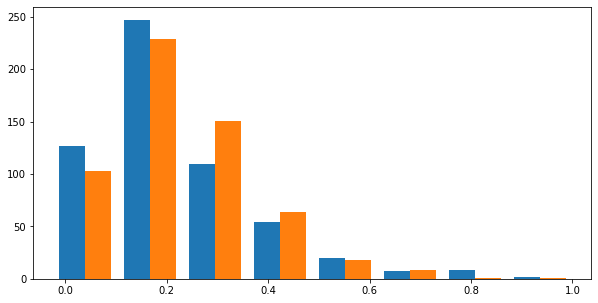

In [48]:
print("Accuracy : ",yScore)
print("\n")
tableB={}
tableB=testAndPredictedTable(ytest,yPredict)
print(tableB.head(25))
plt.figure(figsize=(10,5))
plt.hist(tableB,bins=8)
plt.show()